In [3]:
import pandas as pd

In [21]:
excel_file = 'Seoul_Subway_Passengers(2111_2410).xlsx'


df_1 = pd.read_excel(excel_file, sheet_name='역별_인원')
df_2 = pd.read_excel(excel_file, sheet_name='역별_면적')

df_2.rename(columns={'역명' : '지하철역'}, inplace=True)
merged_df = pd.merge(df_1, df_2[['지하철역', '승강장면적']], on='지하철역', how='left')

for column in df_1.columns:
    if '체류인원' in column:
        congestion_column = column.replace('체류인원', '혼잡도')
        merged_df[congestion_column] = round( ((merged_df[column] / merged_df['승강장면적']) / 4.3 ) * 100,2)


merged_df.head(3)

,사용월,지하철역,04시-05시 승차인원,04시-05시 하차인원,04시-05시 체류인원,05시-06시 승차인원,05시-06시 하차인원,05시-06시 체류인원,06시-07시 승차인원,06시-07시 하차인원,...,16시-17시 혼잡도,17시-18시 혼잡도,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,03시-04시 혼잡도
0,202410,4.19민주묘지,7,3,10,1633,438,2071,3442,1373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202410,가락시장,59,5,64,3147,733,3880,7633,6129,...,131.55,161.55,209.76,120.37,84.93,73.17,30.44,8.09,0.16,0.0
2,202410,가산디지털단지,620,8,628,7138,5289,12427,10085,30502,...,1003.19,2285.52,3128.74,1342.55,788.29,602.19,191.09,41.45,0.06,0.0


In [22]:
merged_columns = [ column for column in merged_df.columns if '혼잡도' in column ]

view_columns = ['사용월', '지하철역'] + merged_columns

filter_df = merged_df[view_columns]

filter_df

,사용월,지하철역,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,...,16시-17시 혼잡도,17시-18시 혼잡도,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,03시-04시 혼잡도
0,202410,4.19민주묘지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202410,가락시장,0.24,14.73,52.25,128.43,192.85,123.11,102.46,104.52,...,131.55,161.55,209.76,120.37,84.93,73.17,30.44,8.09,0.16,0.0
2,202410,가산디지털단지,6.00,118.70,387.68,1543.06,3792.48,2210.21,740.63,581.44,...,1003.19,2285.52,3128.74,1342.55,788.29,602.19,191.09,41.45,0.06,0.0
3,202410,가양,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202410,가오리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,202111,화랑대(서울여대입구),0.07,57.55,205.40,594.77,621.55,305.60,212.94,194.42,...,262.02,347.05,448.34,356.02,197.56,172.00,98.07,9.83,0.00,0.0
10078,202111,회기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10079,202111,회현(남대문시장),0.24,22.23,175.89,443.13,1155.91,877.40,712.40,714.40,...,817.89,943.05,1118.88,432.54,385.11,209.55,47.23,3.24,0.02,0.0
10080,202111,효창공원앞,0.49,31.57,98.36,251.51,546.58,305.11,185.41,175.39,...,251.02,308.06,469.40,251.07,150.69,139.72,64.46,7.08,0.00,0.0


In [23]:
nan_rows = filter_df[filter_df.isna().any(axis=1)]

name_nan = nan_rows['지하철역'].unique()

name_nan

array(['4.19민주묘지', '가양', '가오리', '가좌', '개포동', '개화', '공항시장', '광운대', '구룡',
       '구반포', '국회의사당', '노들', '노량진', '대모산입구', '둔촌오륜', '등촌', '마곡나루(서울식물원)',
       '망우', '봉은사', '북한산보국문', '북한산우이', '사평', '삼성중앙', '삼양', '삼양사거리', '삼전',
       '샛강', '서강대', '서빙고', '서울숲', '석촌고분', '선유도', '선정릉', '솔밭공원', '솔샘',
       '송파나루', '신논현', '신목동', '신반포', '신방화', '신이문', '압구정로데오', '양천향교', '언주',
       '염창', '외대앞', '용산', '응봉', '정릉', '중앙보훈병원', '증미', '한남', '한성백제', '한티',
       '화계', '회기', '흑석(중앙대입구)', '뚝섬유원지'], dtype=object)

In [24]:
filter_df.to_excel('Subway_congestion.xlsx', index=False)

혼잡률은 철도안전관리체계 기술기준(도시철도정거장 및 환승편의시설 설계지침)에			
따라 면적(m2)당 4.3명을 기준(100%)으로 인원 초과 비율에 따라 산출된다.			
※ 예) 실시간 승강장 체류인원 : 300명, 승강장 면적 : 50m2, 면적당기준인원 : 4.3명,			
→ 혼잡률 : (300 ÷ 50) / 4.3 = 1.395(139.5%) → 혼잡도 : 주의			
            
1단계	2단계	3단계	4단계
129%	149%	169%	170%
보통	주의	혼잡	심각

- 시간대 별로 지나간 열차의 갯수를 반영 
- 1시간 동안 총 이용인원 을 어떻게 평균을 낼지 고민 

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('metro_sample.xlsx')

df.head(3)

,사용월,지하철역,행정구역,대합실면적,승강장면적,04시-05시 승차인원,04시-05시 하차인원,04시-05시 체류인원,04시-05시 평균,05시-06시 승차인원,...,01시-02시 체류인원,01시-02시 평균,02시-03시 승차인원,02시-03시 하차인원,02시-03시 체휴인원,02시-03시 평균,03시-04시 승차인원,03시-04시 하차인원,03시-04시 체류인원,03시-04시 평균
0,202410,4.19민주묘지,강북구,NaN,NaN,7,3,10,0.333333,1633,...,0,0.0,0,0,0,0.0,0,0,0,0.0
1,202410,가락시장,송파구,17668.61,6125.5,59,5,64,2.133333,3147,...,42,1.4,0,0,0,0.0,0,0,0,0.0
2,202410,가산디지털단지,금천구,10116.83,2434.7,620,8,628,20.933333,7138,...,6,0.2,0,0,0,0.0,0,0,0,0.0


In [3]:
average_columns = [col for col in df.columns if '평균' in col]

for column in average_columns:
    congestion_column = column.replace('평균', '혼잡도')  # 새로운 컬럼 이름 지정
    df[congestion_column] = round(((df[column] / df['승강장면적']) / 4.3) * 100, 2)

df.head(3)


,사용월,지하철역,행정구역,대합실면적,승강장면적,04시-05시 승차인원,04시-05시 하차인원,04시-05시 체류인원,04시-05시 평균,05시-06시 승차인원,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
0,202410,4.19민주묘지,강북구,NaN,NaN,7,3,10,0.333333,1633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202410,가락시장,송파구,17668.61,6125.5,59,5,64,2.133333,3147,...,6.99,4.01,2.83,2.44,2.03,1.01,0.27,0.01,0.0,0.0
2,202410,가산디지털단지,금천구,10116.83,2434.7,620,8,628,20.933333,7138,...,104.29,44.75,26.28,20.07,12.72,6.37,1.38,0.00,0.0,0.0


In [5]:
merged_columns = [ column for column in df.columns if '혼잡도' in column ]

view_columns = ['사용월', '지하철역'] + merged_columns

filter_df = df[view_columns]

filter_df

,사용월,지하철역,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
0,202410,4.19민주묘지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202410,가락시장,0.01,0.49,1.74,4.28,6.43,4.10,3.42,3.48,...,6.99,4.01,2.83,2.44,2.03,1.01,0.27,0.01,0.0,0.0
2,202410,가산디지털단지,0.20,3.96,12.92,51.44,126.42,73.67,24.69,19.38,...,104.29,44.75,26.28,20.07,12.72,6.37,1.38,0.00,0.0,0.0
3,202410,가양,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202410,가오리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10041,202111,화랑대(서울여대입구),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10042,202111,회기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10043,202111,회현(남대문시장),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10044,202111,효창공원앞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
filter_df.to_excel('metro_sample_congestion.xlsx', index=False)

In [7]:
con_df = pd.read_excel('metro_sample_congestion.xlsx')

con_df.head(3)

,사용월,지하철역,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
0,202410,4.19민주묘지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202410,가락시장,0.01,0.49,1.74,4.28,6.43,4.10,3.42,3.48,...,6.99,4.01,2.83,2.44,2.03,1.01,0.27,0.01,0.0,0.0
2,202410,가산디지털단지,0.20,3.96,12.92,51.44,126.42,73.67,24.69,19.38,...,104.29,44.75,26.28,20.07,12.72,6.37,1.38,0.00,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

congestion_columns = [col for col in con_df.columns if '혼잡도' in col]

melted_df = df.melt(id_vars=['사용월', '지하철역'], 
                    value_vars=congestion_columns, 
                    var_name='시간대', 
                    value_name='혼잡도')

melted_df

,사용월,지하철역,시간대,혼잡도
0,202410,4.19민주묘지,04시-05시 혼잡도,NaN
1,202410,가락시장,04시-05시 혼잡도,0.01
2,202410,가산디지털단지,04시-05시 혼잡도,0.20
3,202410,가양,04시-05시 혼잡도,NaN
4,202410,가오리,04시-05시 혼잡도,NaN
...,...,...,...,...
241099,202111,화랑대(서울여대입구),03시-04시 혼잡도,NaN
241100,202111,회기,03시-04시 혼잡도,NaN
241101,202111,회현(남대문시장),03시-04시 혼잡도,NaN
241102,202111,효창공원앞,03시-04시 혼잡도,NaN


In [14]:
df_cleaned = melted_df.dropna()
df_cleaned

,사용월,지하철역,시간대,혼잡도
1,202410,가락시장,04시-05시 혼잡도,0.01
2,202410,가산디지털단지,04시-05시 혼잡도,0.20
6,202410,강남,04시-05시 혼잡도,0.05
7,202410,강남구청,04시-05시 혼잡도,0.01
8,202410,강동,04시-05시 혼잡도,0.03
...,...,...,...,...
236074,202305,홍제,03시-04시 혼잡도,0.00
236076,202305,화곡,03시-04시 혼잡도,0.00
236077,202305,화랑대(서울여대입구),03시-04시 혼잡도,0.00
236079,202305,회현(남대문시장),03시-04시 혼잡도,0.00


In [16]:
df = pd.read_excel('metro_sample.xlsx')
df.head(3)

,사용월,지하철역,행정구역,대합실면적,승강장면적,04시-05시 승차인원,04시-05시 하차인원,04시-05시 체류인원,05시-06시 승차인원,05시-06시 하차인원,...,00시-01시 체류인원,01시-02시 승차인원,01시-02시 하차인원,01시-02시 체류인원,02시-03시 승차인원,02시-03시 하차인원,02시-03시 체휴인원,03시-04시 승차인원,03시-04시 하차인원,03시-04시 체류인원
0,202410,4.19민주묘지,강북구,NaN,NaN,7,3,10,1633,438,...,793,0,0,0,0,0,0,0,0,0
1,202410,가락시장,송파구,17668.61,6125.5,59,5,64,3147,733,...,2130,2,40,42,0,0,0,0,0,0
2,202410,가산디지털단지,금천구,10116.83,2434.7,620,8,628,7138,5289,...,4340,3,3,6,0,0,0,0,0,0


In [18]:
import calendar

def get_days(yyyymm) :
    year = int(str(yyyymm)[:4])
    month = int(str(yyyymm)[4:6])
    return calendar.monthrange(year, month)[1]

df['일수'] = df['사용월'].apply(get_days)

average_columns = [col for col in df.columns if '평균' in col]

for col in average_columns:
    new_col = col.replace('평균', '월별 평균')
    df[new_col] = round(df[col] / df['일수'], 2)



In [19]:
df.head(3)

,사용월,지하철역,행정구역,대합실면적,승강장면적,04시-05시 승차인원,04시-05시 하차인원,04시-05시 체류인원,05시-06시 승차인원,05시-06시 하차인원,...,01시-02시 승차인원,01시-02시 하차인원,01시-02시 체류인원,02시-03시 승차인원,02시-03시 하차인원,02시-03시 체휴인원,03시-04시 승차인원,03시-04시 하차인원,03시-04시 체류인원,일수
0,202410,4.19민주묘지,강북구,NaN,NaN,7,3,10,1633,438,...,0,0,0,0,0,0,0,0,0,31
1,202410,가락시장,송파구,17668.61,6125.5,59,5,64,3147,733,...,2,40,42,0,0,0,0,0,0,31
2,202410,가산디지털단지,금천구,10116.83,2434.7,620,8,628,7138,5289,...,3,3,6,0,0,0,0,0,0,31


In [20]:
sample_df = pd.read_excel('metro_sample_2.xlsx')
sample_df.head(2)

,사용월,지하철역,행정구역,대합실면적,승강장면적,일수,04시-05시 승차인원,04시-05시 하차인원,04시-05시 체류인원,05시-06시 승차인원,...,00시-01시 체류인원,01시-02시 승차인원,01시-02시 하차인원,01시-02시 체류인원,02시-03시 승차인원,02시-03시 하차인원,02시-03시 체류인원,03시-04시 승차인원,03시-04시 하차인원,03시-04시 체류인원
0,202410,4.19민주묘지,강북구,NaN,NaN,31,7,3,10,1633,...,793,0,0,0,0,0,0,0,0,0
1,202410,가락시장,송파구,17668.61,6125.5,31,59,5,64,3147,...,2130,2,40,42,0,0,0,0,0,0


In [21]:
stay_columns = [col for col in sample_df.columns if '체류인원' in col]

for col in stay_columns :
    new_col = col.replace('체류인원', '일평균')
    sample_df[new_col] = round(sample_df[col] / sample_df['일수'], 2)

sample_df.head(2)

,사용월,지하철역,행정구역,대합실면적,승강장면적,일수,04시-05시 승차인원,04시-05시 하차인원,04시-05시 체류인원,05시-06시 승차인원,...,18시-19시 일평균,19시-20시 일평균,20시-21시 일평균,21시-22시 일평균,22시-23시 일평균,23시-24시 일평균,00시-01시 일평균,01시-02시 일평균,02시-03시 일평균,03시-04시 일평균
0,202410,4.19민주묘지,강북구,NaN,NaN,31,7,3,10,1633,...,490.65,389.74,263.81,209.58,178.42,106.94,25.58,0.00,0.0,0.0
1,202410,가락시장,송파구,17668.61,6125.5,31,59,5,64,3147,...,1782.23,1022.71,721.65,621.74,517.35,258.68,68.71,1.35,0.0,0.0


In [27]:
con_columns = [ col for col in sample_df.columns if '일평균' in col ]

for col in con_columns :
    congestion_col = col.replace('일평균', '혼잡도')
    sample_df[congestion_col] = round( ((sample_df[col] / sample_df['승강장면적']) / 4.3 ) * 100, 2)

sample_df.head(2)

,사용월,지하철역,행정구역,대합실면적,승강장면적,일수,04시-05시 승차인원,04시-05시 하차인원,04시-05시 체류인원,05시-06시 승차인원,...,17시-18시 혼잡도,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도
0,202410,4.19민주묘지,강북구,NaN,NaN,31,7,3,10,1633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202410,가락시장,송파구,17668.61,6125.5,31,59,5,64,3147,...,5.21,6.77,3.88,2.74,2.36,1.96,0.98,0.26,0.01,0.0


In [51]:
merged_columns = [ column for column in sample_df.columns if '혼잡도' in column ]

view_columns = ['사용월', '지하철역', '행정구역'] + merged_columns

filter_df = sample_df[view_columns]

filter_df.head(2)

,사용월,지하철역,행정구역,03시-04시 혼잡도,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,...,17시-18시 혼잡도,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도
0,202410,4.19민주묘지,강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202410,가락시장,송파구,0.0,0.01,0.48,1.69,4.14,6.22,3.97,...,5.21,6.77,3.88,2.74,2.36,1.96,0.98,0.26,0.01,0.0


In [52]:
filter_df = filter_df.dropna()

In [53]:
filter_df.to_excel('metro_congestion_sample.xlsx', index=False)

In [43]:
df_pivot = filter_df.melt(id_vars=['사용월', '지하철역'], value_vars=merged_columns, var_name='시간대', value_name='혼잡도')

df_pivot

,사용월,지하철역,시간대,혼잡도
0,202410,가락시장,03시-04시 혼잡도,0.0
1,202410,가산디지털단지,03시-04시 혼잡도,0.0
2,202410,강남,03시-04시 혼잡도,0.0
3,202410,강남구청,03시-04시 혼잡도,0.0
4,202410,강동,03시-04시 혼잡도,0.0
...,...,...,...,...
191179,202111,홍제,02시-03시 혼잡도,0.0
191180,202111,화곡,02시-03시 혼잡도,0.0
191181,202111,화랑대(서울여대입구),02시-03시 혼잡도,0.0
191182,202111,회현(남대문시장),02시-03시 혼잡도,0.0


In [45]:
pivot_heatmap = df_pivot.pivot_table(index='지하철역', columns='사용월', values='혼잡도', aggfunc='mean')


In [49]:
plt.rc('font', family='AppleGothic')

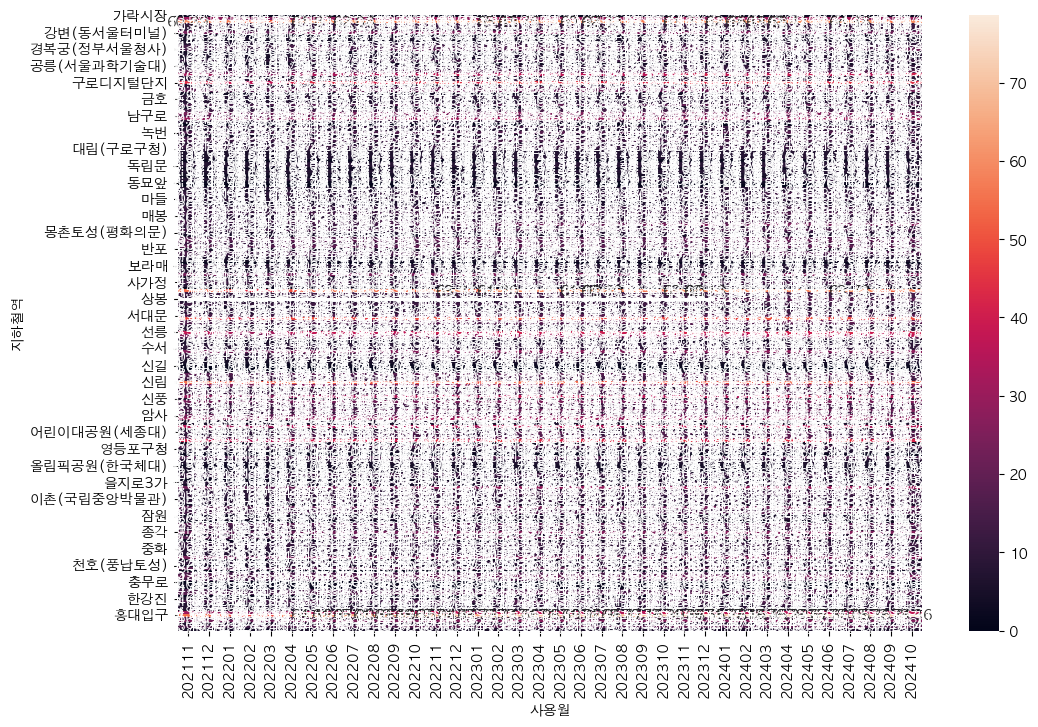

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(pivot_heatmap, annot=True, fmt='.2f')
plt.show()

다시 처음부터 생각해보자

In [54]:
df = pd.read_excel('metro_data_restart.xlsx')
df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,2179,0,28,0,0,0,0,0,0,20211203
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,1720,0,0,0,0,0,0,0,0,20220103


In [55]:

for col in df.columns :
    if '승차인원' in col :
        exit_col = col.replace('승차인원', '하차인원')
        if exit_col in df.columns :
            stay_col = col.replace('승차인원', '체류인원')
            df[stay_col] = df[col] + df[exit_col]

df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,11217,9453,5773,4917,4159,2485,28,0,0,0
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,10614,8862,5897,5278,3839,1983,0,0,0,0


In [58]:
stay_columns = [col for col in df.columns if '체류인원' in col]

for col in stay_columns :
    new_col = col.replace('체류인원', '일평균')
    df[new_col] = round(df[col] / df['월일수'], 1)

df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 일평균,19시-20시 일평균,20시-21시 일평균,21시-22시 일평균,22시-23시 일평균,23시-24시 일평균,00시-01시 일평균,01시-02시 일평균,02시-03시 일평균,03시-04시 일평균
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,373.9,315.1,192.4,163.9,138.6,82.8,0.9,0.0,0.0,0.0
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,342.4,285.9,190.2,170.3,123.8,64.0,0.0,0.0,0.0,0.0


In [59]:
con_columns = [ col for col in df.columns if '일평균' in col ]

for col in con_columns :
    congestion_col = col.replace('일평균', '혼잡도')
    df[congestion_col] = round( ((df[col] / df['승강장면적']) / 4.3 ) * 100, 2)

df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df['호선명'].unique()

array(['3호선', '8호선', '7호선', '2호선', '5호선', '6호선', '4호선', '1호선'],
      dtype=object)

In [62]:
df = df.dropna()

In [65]:
df.to_excel('metro.xlsx',index=False)

In [ ]:
# '사용월'로 월별 그룹화하여 시간대별 혼잡도의 평균을 계산
monthly_avg_congestion = sample_df.groupby('사용월').mean(numeric_only=True).reset_index()

# 필요한 컬럼(사용월과 시간대별 혼잡도)만 선택
result_df = monthly_avg_congestion[['사용월'] + [col for col in sample_df.columns if '혼잡도' in col]]

# 결과 확인
print(result_df.head())


In [68]:
monthly_avg_congestion = df.groupby('사용월').mean(numeric_only=True).reset_index()

result_df = monthly_avg_congestion[['사용월'] + [col for col in df.columns if '혼잡도' in col]]

result_df

,사용월,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,12시-13시 혼잡도,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
0,202111,0.037031,2.564102,7.237148,18.511914,33.080703,20.937969,13.220195,12.499727,13.347812,...,32.752930,19.880977,12.744375,11.727578,10.105234,5.031641,0.393906,0.000000,0.000000,0.000000
1,202112,0.033281,2.352383,6.742539,17.319375,31.134023,19.527891,12.481484,11.862891,12.812031,...,30.767109,18.511523,12.554023,13.064297,8.477070,3.607969,0.238750,0.000000,0.000000,0.000000
2,202201,0.028398,2.115078,6.116523,15.519102,28.518516,18.379805,11.871484,11.437031,12.448906,...,28.362070,17.233555,12.572070,15.058086,6.855586,2.234336,0.121406,0.000000,0.000000,0.000000
3,202202,0.027578,2.094961,5.935234,14.773945,26.591992,17.193672,11.202930,10.826914,11.858828,...,26.876094,16.468516,11.426680,12.350547,7.457031,2.306836,0.119766,0.000000,0.000000,0.000000
4,202203,0.030625,2.244844,6.420117,16.523594,28.057695,17.520078,11.355156,10.728164,11.737695,...,27.725273,17.127969,11.065000,10.032305,8.808203,4.745625,0.300430,0.000000,0.000000,0.000000
5,202204,0.033906,2.518477,7.262266,18.558281,31.580117,20.086680,13.313984,12.626875,13.602852,...,31.793594,19.732578,13.088633,11.980547,10.419688,5.607500,0.434766,0.000000,0.000000,0.000000
6,202205,0.037969,2.774414,7.805391,19.378516,32.905820,21.267852,14.440039,13.729414,14.684688,...,32.961836,20.745781,14.160391,13.221914,11.648398,6.221094,0.506602,0.000000,0.000000,0.000000
7,202206,0.037461,2.755937,7.738594,19.144414,32.215742,20.767422,13.932461,13.360508,14.224180,...,31.970039,19.895703,13.559609,12.683047,11.159648,5.908750,1.060586,0.024883,0.000000,0.000000
8,202207,0.035313,2.702266,7.599336,18.696445,31.528398,20.356289,13.523086,13.029492,14.033398,...,32.044297,19.674023,13.356992,12.590547,11.003438,5.765313,1.152383,0.026797,0.000000,0.000000
9,202208,0.035625,2.582383,7.336992,18.161172,30.700195,19.750156,13.104883,12.465312,13.418750,...,31.501758,19.243789,12.825313,11.865430,10.207344,5.312031,1.260195,0.035859,0.000000,0.000000


In [66]:
df['사용월'].unique()

array([202111, 202112, 202201, 202202, 202203, 202204, 202205, 202206,
       202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302,
       202303, 202304, 202305, 202306, 202307, 202308, 202309, 202310,
       202311, 202312, 202401, 202402, 202403, 202404, 202405, 202406,
       202407, 202408, 202409, 202410])

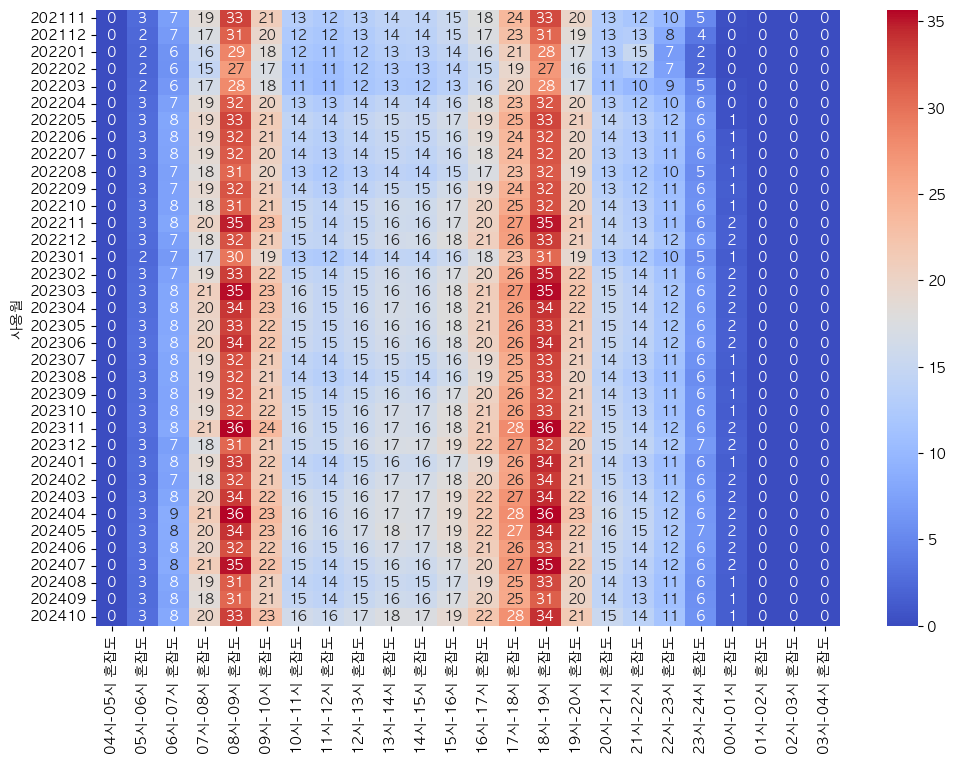

In [71]:
map_data = result_df.set_index('사용월')

plt.figure(figsize=(12,8))
sns.heatmap(map_data, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [73]:
monthly_line_avg = (df.groupby(['사용월','호선명']).mean(numeric_only=True).reset_index())

line_result = monthly_line_avg[['사용월', '호선명'] + [col for col in df.columns if '혼잡도' in col]]

line_result

,사용월,호선명,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
0,202111,1호선,0.126000,2.964000,7.178000,16.448000,35.148000,24.235000,18.139000,19.945000,...,37.013000,18.668000,12.935000,12.463000,9.305000,4.208000,0.352000,0.000000,0.0,0.0
1,202111,2호선,0.096591,3.910682,10.650000,27.167727,55.803182,38.903182,22.492727,20.585682,...,59.564091,35.634091,23.416364,22.306591,20.061591,9.808409,0.649545,0.000000,0.0,0.0
2,202111,3호선,0.024706,1.982353,7.290882,18.066471,30.304118,21.031176,14.295294,13.422647,...,32.005882,19.220000,12.499118,11.039118,9.080000,4.082941,0.330588,0.000000,0.0,0.0
3,202111,4호선,0.056538,2.799231,8.512308,20.458846,32.533846,21.450000,15.495769,15.157692,...,33.753077,21.775000,14.278077,13.077308,10.919615,5.703846,0.366923,0.000000,0.0,0.0
4,202111,5호선,0.007500,1.955192,5.880192,16.497115,27.700192,14.027885,8.937115,8.744615,...,25.172692,14.352885,9.026538,8.193077,6.994615,3.428654,0.311923,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,202410,4호선,0.068462,3.196923,9.578077,21.637692,33.431923,24.670000,19.941923,20.146923,...,37.531923,25.207308,18.567692,16.943462,14.196538,7.495385,1.720385,0.080385,0.0,0.0
284,202410,5호선,0.012500,2.292115,6.755192,17.332885,27.657308,15.340577,10.979423,10.866923,...,26.539423,15.389615,10.752500,9.771154,7.975000,3.999423,1.046923,0.024231,0.0,0.0
285,202410,6호선,0.019487,1.837436,4.432821,10.526667,16.433333,10.679487,8.247179,7.955128,...,16.504359,11.189744,8.043333,7.374872,6.462308,3.808974,1.009744,0.006154,0.0,0.0
286,202410,7호선,0.030488,3.514878,8.609512,19.778537,32.107561,21.247073,14.284390,13.135366,...,29.248780,19.232439,12.727561,11.204390,9.281951,5.076829,1.421220,0.025122,0.0,0.0


In [75]:
line_result.to_excel('metro_2.xlsx', index=False)